In [1]:
import pandas as  pd

articles = pd.read_csv('~/Downloads/archive (4)/shared_articles.csv')
print("Articles Data:")
print(articles.head())

interactions = pd.read_csv('/Users/nikhildeekonda/Downloads/archive (4)/users_interactions.csv')
print("Interactions Data:")
print(interactions.head())

Articles Data:
    timestamp        eventType            contentId       authorPersonId  \
0  1459192779  CONTENT REMOVED -6451309518266745024  4340306774493623681   
1  1459193988   CONTENT SHARED -4110354420726924665  4340306774493623681   
2  1459194146   CONTENT SHARED -7292285110016212249  4340306774493623681   
3  1459194474   CONTENT SHARED -6151852268067518688  3891637997717104548   
4  1459194497   CONTENT SHARED  2448026894306402386  4340306774493623681   

       authorSessionId authorUserAgent authorRegion authorCountry contentType  \
0  8940341205206233829             NaN          NaN           NaN        HTML   
1  8940341205206233829             NaN          NaN           NaN        HTML   
2  8940341205206233829             NaN          NaN           NaN        HTML   
3 -1457532940883382585             NaN          NaN           NaN        HTML   
4  8940341205206233829             NaN          NaN           NaN        HTML   

                                         

In [2]:
articles.drop_duplicates(inplace=True)
interactions.drop_duplicates(inplace=True)

print("Missing values in Articles Data:")
print(articles.isnull().sum())

print("Missing values in Interactions Data:")
print(interactions.isnull().sum())

Missing values in Articles Data:
timestamp             0
eventType             0
contentId             0
authorPersonId        0
authorSessionId       0
authorUserAgent    2442
authorRegion       2442
authorCountry      2442
contentType           0
url                   0
title                 0
text                  0
lang                  0
dtype: int64
Missing values in Interactions Data:
timestamp          0
eventType          0
contentId          0
personId           0
sessionId          0
userAgent      15394
userRegion     15405
userCountry    15394
dtype: int64


In [3]:
missing_threshold = 0.5  

articles = articles.dropna(thresh=len(articles) * missing_threshold, axis=1)
interactions.dropna(subset=['userAgent', 'userRegion', 'userCountry'], inplace=True)

print("\nColumns after dropping high missing value columns:")
print("Articles Data:")
print(articles.info())
print("\nInteractions Data:")
print(interactions.info())


Columns after dropping high missing value columns:
Articles Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        3122 non-null   int64 
 1   eventType        3122 non-null   object
 2   contentId        3122 non-null   int64 
 3   authorPersonId   3122 non-null   int64 
 4   authorSessionId  3122 non-null   int64 
 5   contentType      3122 non-null   object
 6   url              3122 non-null   object
 7   title            3122 non-null   object
 8   text             3122 non-null   object
 9   lang             3122 non-null   object
dtypes: int64(4), object(6)
memory usage: 244.0+ KB
None

Interactions Data:
<class 'pandas.core.frame.DataFrame'>
Index: 56896 entries, 1 to 72311
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    56896 

Summary Statistics for Articles Data:
          timestamp     contentId  authorPersonId  authorSessionId
count  3.122000e+03  3.122000e+03    3.122000e+03     3.122000e+03
mean   1.468804e+09  3.284110e+16    3.984819e+17     1.976675e+17
std    7.571512e+06  5.383734e+18    4.387115e+18     5.403753e+18
min    1.459193e+09 -9.222795e+18   -9.120686e+18    -9.212055e+18
25%    1.462369e+09 -4.660869e+18   -1.578288e+18    -4.651280e+18
50%    1.467136e+09  4.436584e+16   -7.092877e+17     4.154103e+17
75%    1.473873e+09  4.745617e+18    3.609194e+18     4.841644e+18
max    1.488308e+09  9.222265e+18    9.210531e+18     9.221043e+18
Summary Statistics for Interactions Data:
          timestamp     contentId      personId     sessionId
count  5.689600e+04  5.689600e+04  5.689600e+04  5.689600e+04
mean   1.471114e+09 -7.568504e+16  1.644579e+16  9.926911e+13
std    7.710352e+06  5.362304e+18  5.054700e+18  5.337498e+18
min    1.457964e+09 -9.222795e+18 -9.223122e+18 -9.222505e+18
25%    

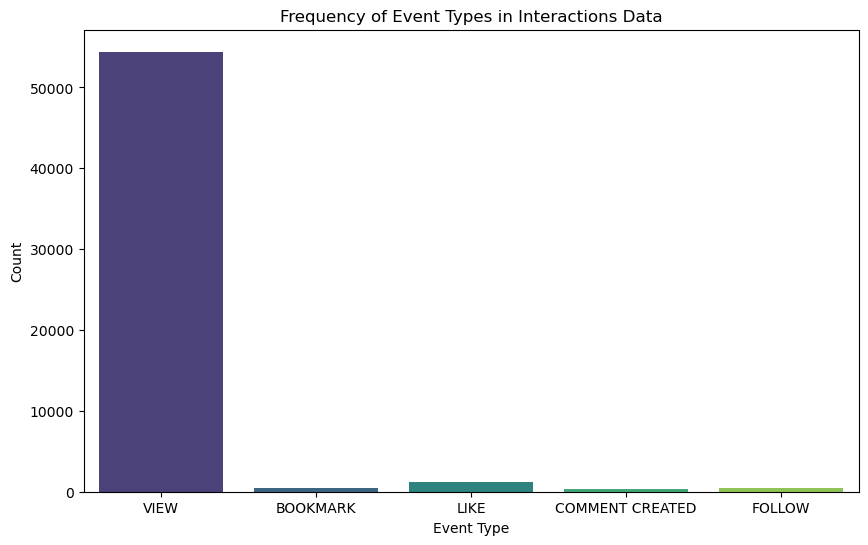

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Summary Statistics for Articles Data:")
print(articles.describe())
print("Summary Statistics for Interactions Data:")
print(interactions.describe())

plt.figure(figsize=(10, 6))
sns.countplot(x='eventType', data=interactions, palette='viridis')
plt.title('Frequency of Event Types in Interactions Data')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

In [5]:
interactions['eventType'].value_counts()

eventType
VIEW               54420
LIKE                1256
BOOKMARK             479
FOLLOW               403
COMMENT CREATED      338
Name: count, dtype: int64

Understanding these event types can help in designing and fine-tuning the recommendation system. For example, "LIKE" events might indicate stronger user preferences, while "VIEW" events provide a broader view of user interests. Incorporating these insights into the recommendation algorithm can lead to more personalized and relevant article recommendations for users.

The selection of features for the interaction matrix in the collaborative filtering model was driven by the goal of capturing the strength of user preferences based on their interactions with content. Here’s why these specific features were chosen:

### 1. **Event Type Weighting**
Each type of interaction with content (e.g., view, like, bookmark) carries different implications about a user’s preference or engagement level. By assigning different weights to these event types, we aim to differentiate between casual interest and strong preference, which can improve the accuracy of the recommendations. Here's the rationale for each weight:

- **VIEW (weight = 1.0)**: Most common and basic interaction, indicating that the user has seen the content. It’s the least indicative of a strong preference because users often view many items casually.
  
- **LIKE (weight = 2.0)**: Indicates a higher level of user engagement than a view. Liking content typically requires a conscious decision that reflects a positive evaluation, making it a stronger indicator of preference.
  
- **BOOKMARK (weight = 2.5)**: Suggests a significant level of interest as users bookmark content to return to it later, indicating it was valuable or particularly interesting to them.

- **FOLLOW (weight = 3.0)**: Involves a commitment to receive ongoing updates from an author or about a topic, indicating a strong, ongoing interest.

- **COMMENT CREATED (weight = 3.5)**: The strongest indicator of engagement. Writing a comment involves not only consuming content but engaging with it at a deeper level, often reflecting a high degree of interest or strong feelings about the content.

### 2. **Person ID and Content ID**
These are fundamental to creating the interaction matrix:

- **Person ID**: Represents individual users in the system. It’s crucial for tracking and analyzing the interaction patterns of different users.
  
- **Content ID**: Represents the individual items (articles, books, etc.) in the database. It’s essential for identifying which items are being interacted with and recommending other similar items.

### 3. **Interaction Matrix as the Data Structure**
The use of a user-item interaction matrix (pivot table) allows the recommendation system to efficiently look up and compute similarities between users based on their interaction patterns or between items based on how users have interacted with them. This matrix is central to many collaborative filtering algorithms, especially matrix factorization techniques like SVD, which decompose the matrix to identify latent factors that explain observed interactions.

This feature selection effectively captures the necessary information to understand user preferences and predict potential items of interest, making it foundational for building an effective collaborative filtering system.

In [6]:
from scipy.sparse import csr_matrix

weights = {
    'VIEW': 1.0,
    'LIKE': 2.0,
    'BOOKMARK': 2.5,
    'FOLLOW': 3.0,
    'COMMENT CREATED': 3.5
}

interactions['weight'] = interactions['eventType'].map(weights)

interaction_matrix = interactions.pivot_table(index='personId', columns='contentId', values='weight', fill_value=0)

interaction_matrix_sparse = csr_matrix(interaction_matrix.values)

The weights we've assigned to different types of interactions (view, like, bookmark, follow, comment created) serve as a way to quantify the strength or intensity of a user's interaction with an item. These weights help in differentiating the impact of each type of interaction on the user's overall preference toward an item. The predictive model then uses these weighted interactions to forecast a user's likely level of interest or preference for items they haven't interacted with yet.

### SVD in Collaborative Filtering

**Singular Value Decomposition (SVD)** is a matrix factorization technique often used in collaborative filtering for recommendation systems. It works by decomposing the original user-item interaction matrix into three simpler matrices, capturing the underlying structure in the interactions between users and items. Here’s how it typically works in collaborative filtering:

1. **Matrix Representation**: Start with a matrix where rows represent users, columns represent items, and the entries are ratings that users have given to items. In many real-world scenarios, this matrix is sparse because not every user rates every item.

2. **Decomposition**: SVD decomposes the user-item matrix \( R \) into three matrices: \( U \), \( \Sigma \), and \( V^T \):
   - \( U \) (user features matrix): Each row represents a user, and the columns are latent factors representing underlying user preferences.
   - \( \Sigma \) (diagonal matrix): Contains singular values that measure the strength of each latent factor. It helps in identifying which features are the most important in the interaction dataset.
   - \( V^T \) (item features matrix): Each column represents an item, and rows are the same latent factors found in \( U \). The transpose indicates that it aligns with the \( U \) matrix for multiplication.

3. **Dimensionality Reduction**: By reducing the number of latent factors (trimming down \( \Sigma \) and corresponding columns in \( U \) and rows in \( V^T \)), you can approximate the original matrix with a simpler model. This reduces noise and overfitting.

4. **Prediction**: Predict unknown ratings by re-multiplying the decomposed matrices. The product gives an approximation of the original matrix but now includes predicted ratings in the places where originally there was missing data.

Here's a step-by-step explanation of what we're predicting and how:

### What Are We Predicting?
The output of the collaborative filtering model, specifically the SVD model in this case, is a **predicted rating**. This rating is a numerical value that estimates how much a user might like or be interested in an item. It's not directly predicting a specific interaction like a "like" or a "view". Instead, it predicts a generalized preference level based on patterns learned from the weighted interactions across all users.

### How Are We Predicting It?
1. **Quantifying Interactions**: By assigning weights to different types of interactions, you quantify how significant each interaction type is in expressing a user's preference. For instance, a 'comment created' carries more weight than a 'view', indicating that commenting is a stronger endorsement of content.

2. **Creating an Interaction Matrix**: We create a user-item interaction matrix where each entry is the weighted sum of interactions a user has with an item. If a user has multiple interactions with the same item, these interactions are summed up with their respective weights to represent the overall interaction strength.

3. **Matrix Factorization (SVD)**: The Singular Value Decomposition (SVD) algorithm is applied to this matrix to identify latent factors that explain the observed interactions. SVD decomposes the original matrix into factors that capture underlying patterns in user-item interactions—these patterns might correspond to unobserved user preferences and item attributes.

4. **Predicting Missing Values**: The SVD model uses these factors to predict missing entries in the interaction matrix, which represent unobserved interactions. A predicted value in this context reflects the model’s estimation of how strongly a user would prefer an item based on the behavior of similar users.

5. **Generating Recommendations**: By calculating these predictions for items that a user hasn't interacted with, the model can suggest new items that the user is likely to prefer, based on their interaction patterns with other items.

In [7]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import GridSearchCV

reader = Reader(rating_scale=(1, 3.5))
data = Dataset.load_from_df(interactions[['personId', 'contentId', 'weight']], reader)

param_grid = {
    'n_factors': [50, 100, 150],
    'reg_all': [0.05, 0.1, 0.2],
    'n_epochs': [20, 30, 40]
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

# Using best parameters to train and evaluate the model
model = SVD(**gs.best_params['rmse'])
model.fit(data.build_full_trainset())
predictions = model.test(data.construct_testset(data.raw_ratings))

print("RMSE on test set:", accuracy.rmse(predictions))

0.29792182481765045
{'n_factors': 50, 'reg_all': 0.1, 'n_epochs': 20}
RMSE: 0.2799
RMSE on test set: 0.2799400729604576


In [8]:
def get_recommendations(user_id, model, interactions_data, articles_data, n_recommendations=10):
    all_items = set(interactions_data['contentId'].unique())
    # items that the user has already interacted with
    interacted_items = set(interactions_data[interactions_data['personId'] == user_id]['contentId'].unique())
    # Items that the user has not interacted with
    non_interacted_items = all_items - interacted_items
    
    # Predict ratings for non-interacted items
    predictions = [model.predict(user_id, item_id) for item_id in non_interacted_items]
    
    predicted_ratings = [(pred.iid, pred.est) for pred in predictions]
    
    # estimated rating in descending order
    predicted_ratings.sort(key=lambda x: x[1], reverse=True)
    
    # top N recommendations
    top_recommendations = predicted_ratings[:n_recommendations]
    
    # article details 
    top_recommendations_details = articles_data[articles_data['contentId'].isin([x[0] for x in top_recommendations])]
    
    # recommendation scores with article details
    recommended_articles = top_recommendations_details.merge(pd.DataFrame(top_recommendations, columns=['contentId', 'PredictedRating']), on='contentId')
    
    return recommended_articles[['title', 'contentId', 'PredictedRating']]

# Example 
user_id = 344280948527967603  
cf_recommended_articles = get_recommendations(user_id, model, interactions, articles, n_recommendations=5)
print("Top 5 recommended articles and their predicted ratings:\n", cf_recommended_articles)

Top 5 recommended articles and their predicted ratings:
                                                title            contentId  \
0  Banco Original discute tendências dos serviços... -6761163882540291832   
1  Blockchain Will Be Used By 15% of Big Banks By...  8631616594020837056   
2  Customize your G Suite experience with App Mak... -3870325027932266414   
3  Indian outsourcing specialists must reboot the...  6847460841437230342   
4              Gmail API: New endpoints for settings  3566197569262766169   

   PredictedRating  
0         1.692041  
1         1.730737  
2         1.852008  
3         1.774706  
4         1.694563  


### Cosine Similarity with TF-IDF in Content-Based Filtering

**TF-IDF (Term Frequency-Inverse Document Frequency)** is a numerical statistic that reflects how important a word is to a document in a collection or corpus. It is often used in text mining and information retrieval. **Cosine similarity** measures the cosine of the angle between two vectors, which in this context are the TF-IDF vectors of two documents. Here’s how they work together:

1. **TF-IDF Vectorization**: Convert text data into a TF-IDF matrix, where:
   - **TF (Term Frequency)**: Measures how frequently a term occurs in a document. More frequent terms in a document have higher TF values.
   - **IDF (Inverse Document Frequency)**: Measures how important a term is within the whole corpus. Terms that occur in many different documents have a lower IDF score.

2. **Vector Representation**: Each document is represented as a vector in a multi-dimensional space where each dimension corresponds to a unique term from the corpus. The value in each dimension is the TF-IDF score of that term in the document.

3. **Cosine Similarity Calculation**: Compute the cosine similarity between two document vectors. The cosine similarity is calculated by taking the dot product of the two vectors and dividing that by the product of their norms (magnitudes):
   \[
   \text{cosine similarity} = \frac{A \cdot B}{\|A\| \|B\|}
   \]
   where \( A \) and \( B \) are two TF-IDF vectors. The result ranges from -1 (exactly opposite) to 1 (exactly the same), with 0 typically indicating orthogonality (no similarity).

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Feature Extraction with TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=20000)  
tfidf_matrix = tfidf.fit_transform(articles['text'])

# Cosine Similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Recommendations
def get_content_based_recommendations(article_id, cosine_sim=cosine_sim, df=articles, top_n=5):
    idx = df.index[df['contentId'] == article_id].tolist()[0]
    
    # Pairwise similarity scores of all articles with the given article
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sorting articles based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Scores of the top n most similar articles
    sim_scores = sim_scores[1:top_n+1]  
    
    # indices of the top n articles
    article_indices = [i[0] for i in sim_scores]
    
    # titles and cosine similarity scores of the top n articles
    recommended_articles = df.iloc[article_indices][['title', 'contentId']]
    recommended_articles['CosineSimilarity'] = [i[1] for i in sim_scores]
    
    return recommended_articles

# Example
cb_recommended_articles = get_content_based_recommendations(article_id=8631616594020837056)
print(cb_recommended_articles)

                                                  title            contentId  \
2248  VISA to Test Blockchain Payments among Banks; ...  8789407896263306493   
224   I've got standards - which one do you want? [U...  8770410950539401126   
3021  Mapping the Global NeoBank Landscape - Techfol...  6844164348224220577   
1784  How This Former Google Engineer Is Bringing Bl...   607684800821303652   
2328  Banks find blockchain hard to put into practic...  5410603488837817052   

      CosineSimilarity  
2248          0.434702  
224           0.371373  
3021          0.364395  
1784          0.360845  
2328          0.360171  


Using a combination of both collaborative filtering and content-based filtering models can help improve recommendation performance in several ways:

1. **Diversity of Recommendations**: Collaborative filtering tends to recommend items that are similar to those a user has already interacted with. Content-based filtering, on the other hand, recommends items based on their attributes or content. By combining these approaches, you can provide a more diverse set of recommendations, including items that are both similar to past interactions and have similar content characteristics.

2. **Cold Start Problem**: Content-based filtering can help address the cold start problem, where new items or users have limited interaction data. Since content-based filtering relies on item attributes, it can recommend new items based on their content, even if they have not yet been interacted with by users.

3. **Improved Personalization**: By combining collaborative and content-based recommendations, you can provide more personalized recommendations that take into account both user preferences (collaborative) and item attributes (content-based). This can lead to recommendations that better match individual user tastes and preferences.

4. **Robustness**: Using a combination of models can make the recommendation system more robust to changes in user behavior or item popularity. If one model performs poorly in certain scenarios, the other model can help mitigate this issue and provide more reliable recommendations.

5. **Enhanced Recommendation Quality**: Ultimately, combining collaborative and content-based filtering can lead to higher-quality recommendations by leveraging the strengths of each approach. This can result in increased user satisfaction and engagement with the recommendation system.

Overall, the combination of collaborative and content-based filtering models can lead to a more effective and robust recommendation system that provides diverse, personalized, and high-quality recommendations to users.

In [10]:
def normalize_scores(scores):
    """ Normalize a list of scores to a 0-1 range. """
    min_score = min(scores)
    max_score = max(scores)
    normalized_scores = [(score - min_score) / (max_score - min_score) for score in scores]
    return normalized_scores

def get_top_combined_recommendations(user_id, article_id, collab_model, interactions_data, articles_data, top_n=5):
    """
    Generate combined recommendations using collaborative and content-based models.
    
    Args:
    - user_id (int): The user ID for whom recommendations are to be made.
    - article_id (int): The article ID used as a seed for content-based recommendations.
    - collab_model (model): Trained collaborative filtering model.
    - content_model (model): Trained content-based model using cosine similarity.
    - interactions_data (DataFrame): DataFrame containing user interactions.
    - articles_data (DataFrame): DataFrame containing article details.
    - top_n (int): Number of top recommendations to return.
    
    Returns:
    - DataFrame containing the top combined recommendations.
    """
    # collaborative filtering recommendations
    collab_recommendations = get_recommendations(user_id, collab_model, interactions_data, articles_data)
    collab_recommendations['normalized_rating'] = normalize_scores(collab_recommendations['PredictedRating'].tolist())
    
    #  content-based recommendations
    content_recommendations = get_content_based_recommendations(article_id)
    content_recommendations['normalized_similarity'] = normalize_scores(content_recommendations['CosineSimilarity'].tolist())
    
    # Merging recommendations
    combined_recommendations = pd.merge(collab_recommendations, content_recommendations, on=('contentId','title'), how='outer')
    combined_recommendations.fillna(0, inplace=True)  
    
    # Combining scores by averaging them
    combined_recommendations['combined_score'] = combined_recommendations[['normalized_rating', 'normalized_similarity']].mean(axis=1)
    
    # Sorting by combined score
    combined_recommendations.sort_values(by='combined_score', ascending=False, inplace=True)
    # top N recommendations
    top_recommendations = combined_recommendations.head(top_n)
    
    return top_recommendations[['title','combined_score']]

get_top_combined_recommendations(user_id= 344280948527967603, article_id =8631616594020837056, collab_model=model, interactions_data=interactions, articles_data=articles)

,title,combined_score
2,Customize your G Suite experience with App Mak...,0.500000
14,VISA to Test Blockchain Payments among Banks; ...,0.500000
11,Indian outsourcing specialists must reboot the...,0.301246
12,Blockchain Will Be Used By 15% of Big Banks By...,0.188195
7,Gmail API: New endpoints for settings,0.095187
